In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from PIL import Image
import sklearn.cluster as cluster
from skimage import io

# os.chdir("/media/ryan/hdd/Dropbox/1_proj/logos/")
os.chdir("/Users/ryan/Dropbox/1_proj/logos/")

In [2]:
features = pd.read_csv("data/marks_erosion-char_higher_fixed.csv")
descs = pd.read_csv("data/mark_features_erosion-char_higher_fixed.csv")
features['frac'] = descs['frac']

## Determine number of clusters:

First, I will just do it on the raw features. These are just based on *shape*, ignoring size. 

In [3]:
feats = features.loc[:,'0':'624'].values

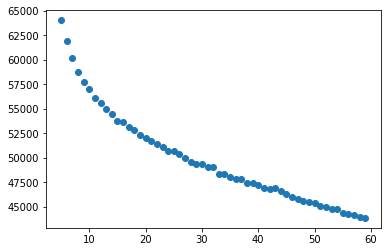

In [4]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

inertia = []
sizes = np.arange(5,60) 
for i in sizes:
    feature_clusters = cluster.KMeans(n_clusters=i)
    feature_clusters.fit(feats)
    inertia = np.append(inertia, feature_clusters.inertia_)
    
plt.scatter(sizes, inertia)

## Cluster the features:

From the inertia plot above (elbow plot), 10-20 seems like a reasonable number.

In [5]:
feature_clusters = cluster.KMeans(n_clusters=15)
feature_fit = feature_clusters.fit_predict(feats)

We need to see if there are actually a reasonable number of features in each bin:

In [6]:
nclust = feature_clusters.cluster_centers_.shape[0]
np.bincount(feature_fit)

array([102,  27, 100,  48,  64,  42,  52,  36,  24,  43,  45,  47, 136,
        56,  25])

### Visualize the results:

First, the cluster centers:

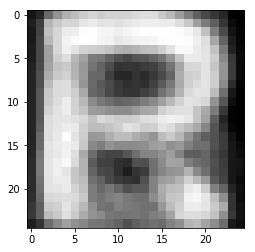

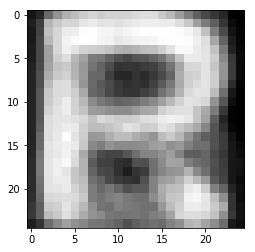

In [7]:
from IPython import display
import time

for i in range(nclust):
    print(i)
    plt.imshow(feature_clusters.cluster_centers_[i,:].reshape(25,25), cmap="gray")
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

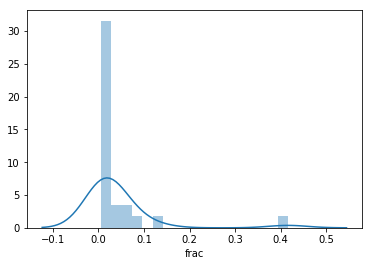

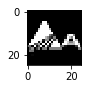

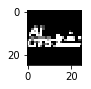

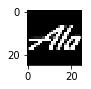

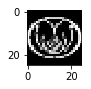

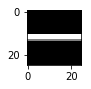

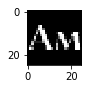

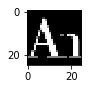

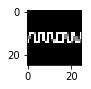

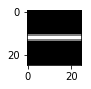

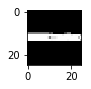

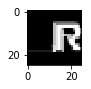

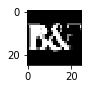

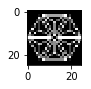

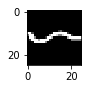

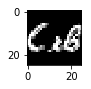

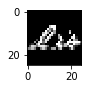

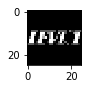

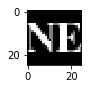

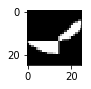

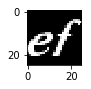

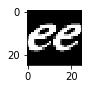

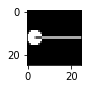

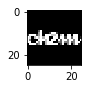

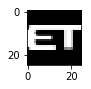

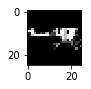

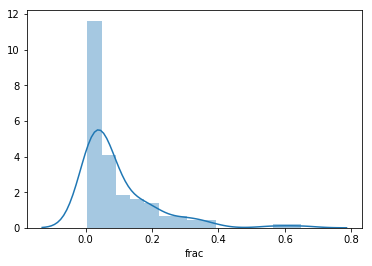

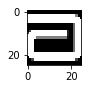

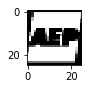

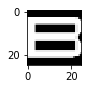

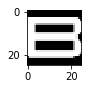

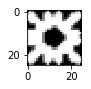

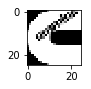

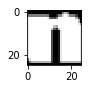

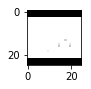

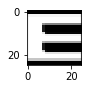

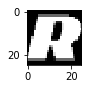

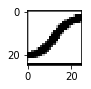

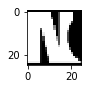

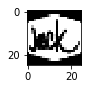

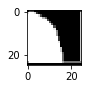

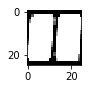

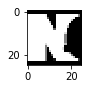

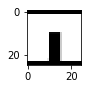

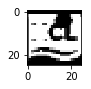

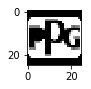

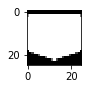

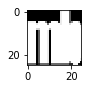

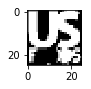

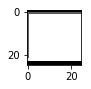

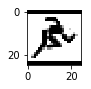

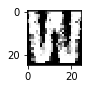

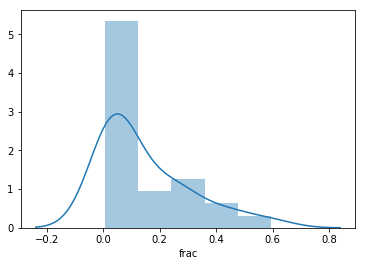

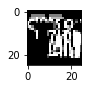

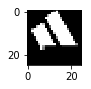

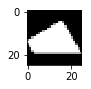

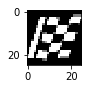

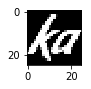

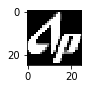

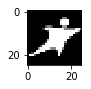

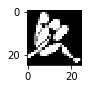

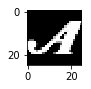

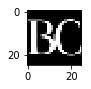

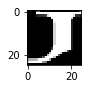

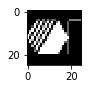

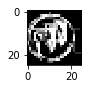

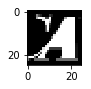

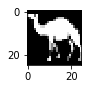

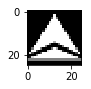

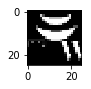

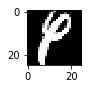

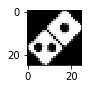

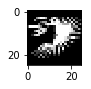

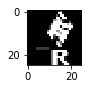

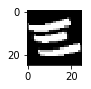

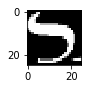

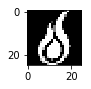

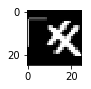

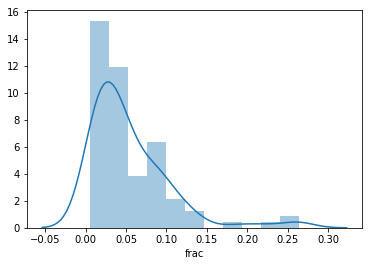

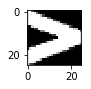

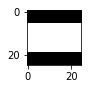

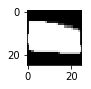

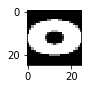

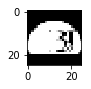

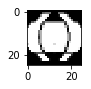

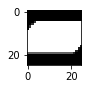

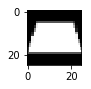

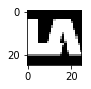

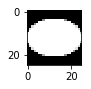

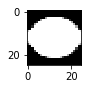

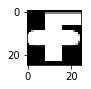

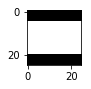

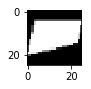

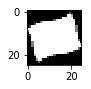

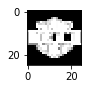

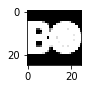

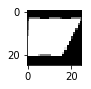

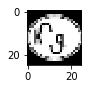

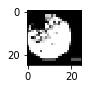

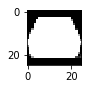

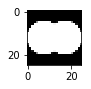

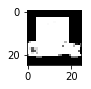

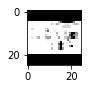

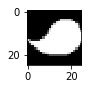

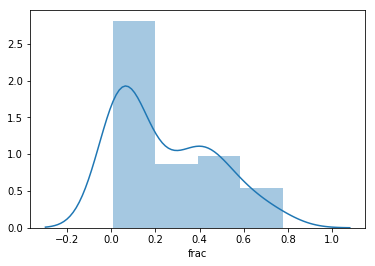

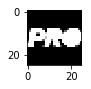

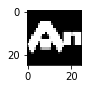

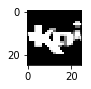

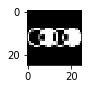

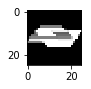

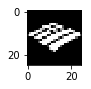

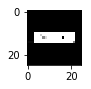

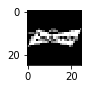

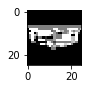

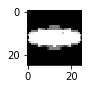

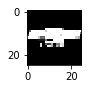

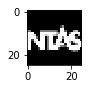

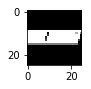

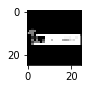

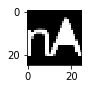

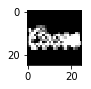

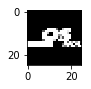

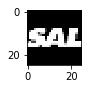

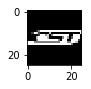

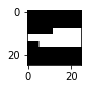

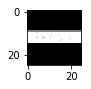

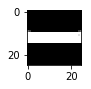

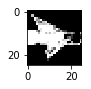

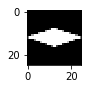

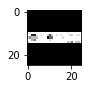

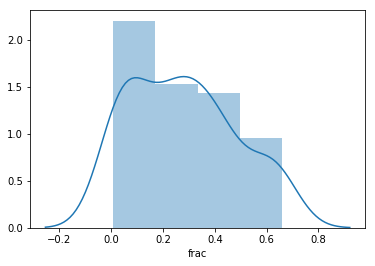

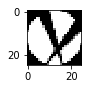

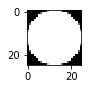

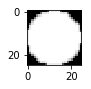

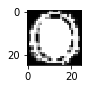

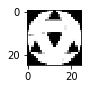

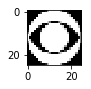

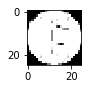

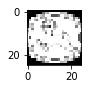

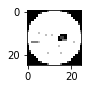

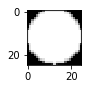

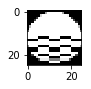

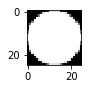

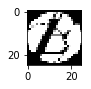

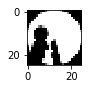

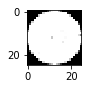

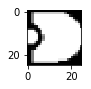

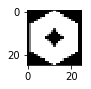

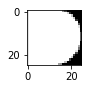

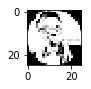

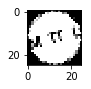

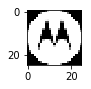

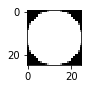

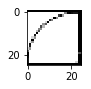

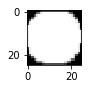

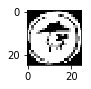

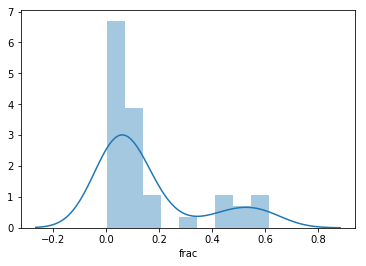

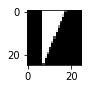

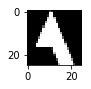

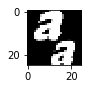

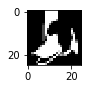

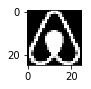

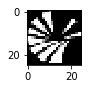

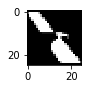

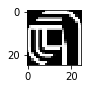

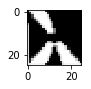

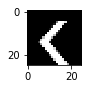

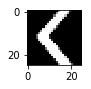

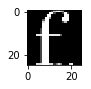

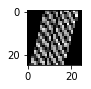

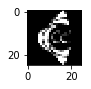

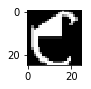

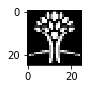

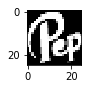

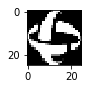

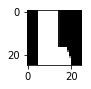

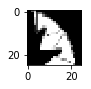

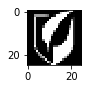

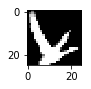

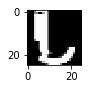

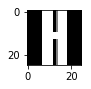

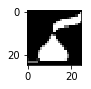

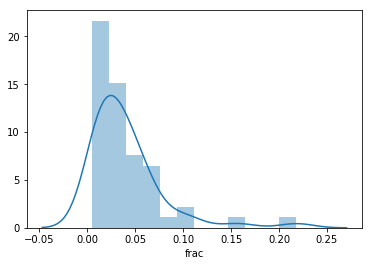

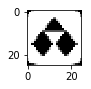

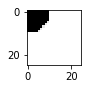

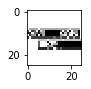

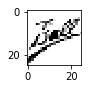

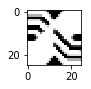

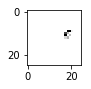

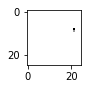

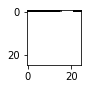

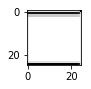

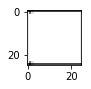

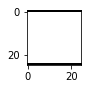

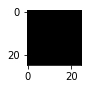

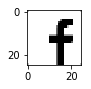

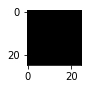

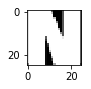

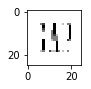

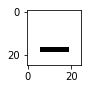

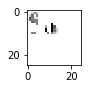

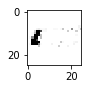

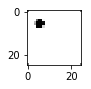

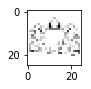

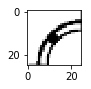

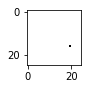

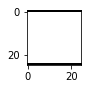

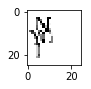

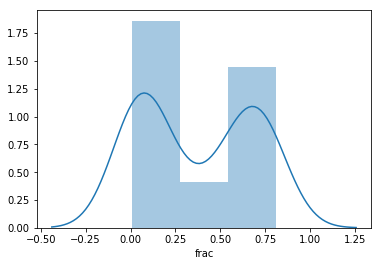

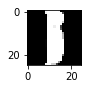

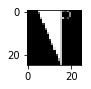

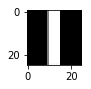

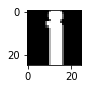

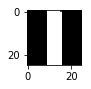

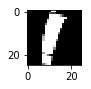

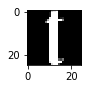

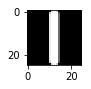

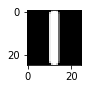

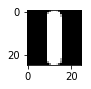

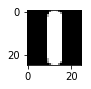

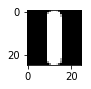

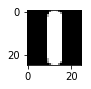

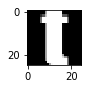

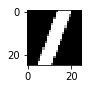

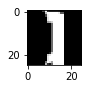

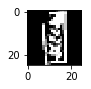

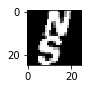

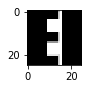

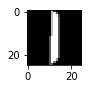

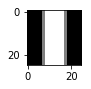

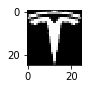

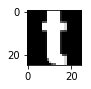

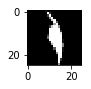

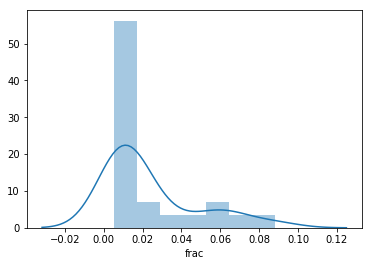

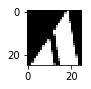

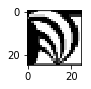

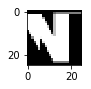

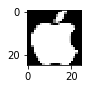

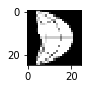

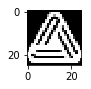

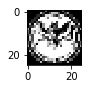

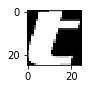

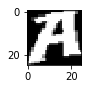

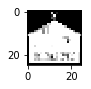

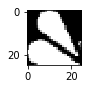

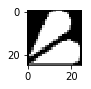

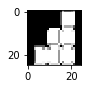

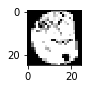

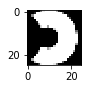

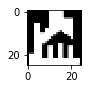

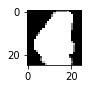

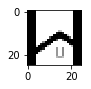

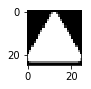

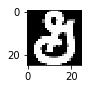

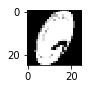

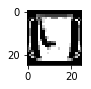

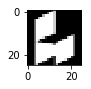

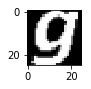

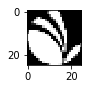

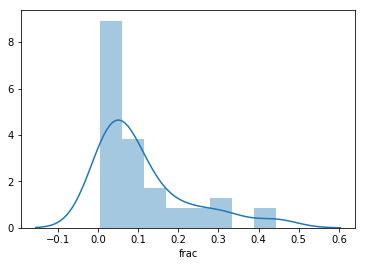

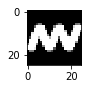

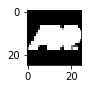

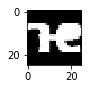

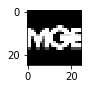

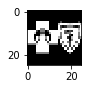

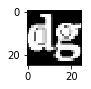

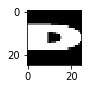

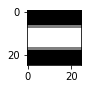

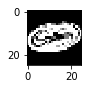

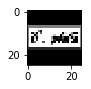

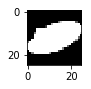

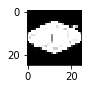

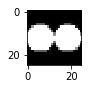

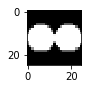

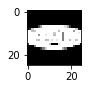

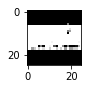

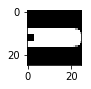

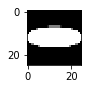

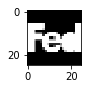

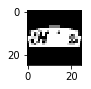

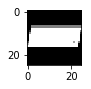

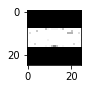

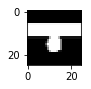

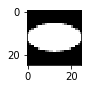

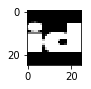

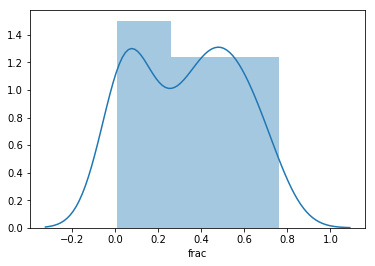

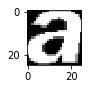

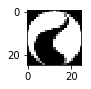

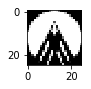

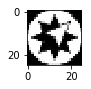

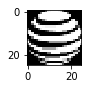

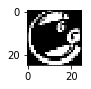

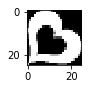

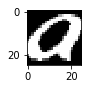

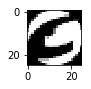

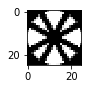

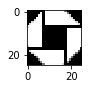

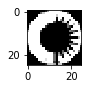

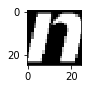

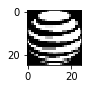

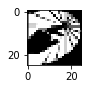

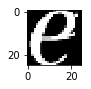

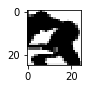

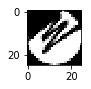

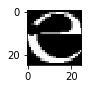

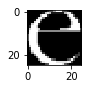

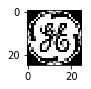

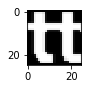

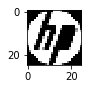

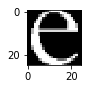

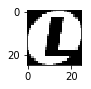

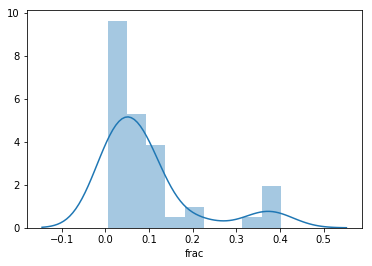

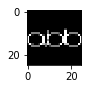

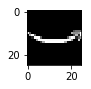

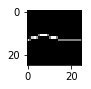

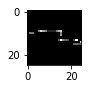

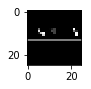

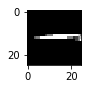

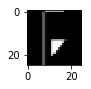

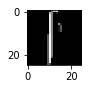

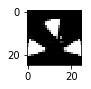

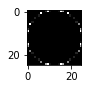

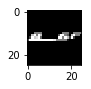

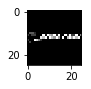

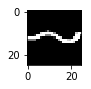

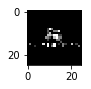

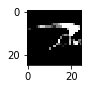

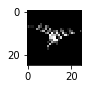

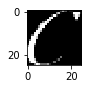

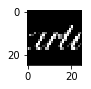

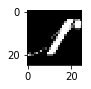

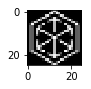

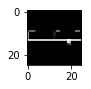

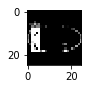

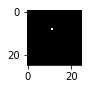

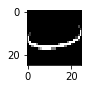

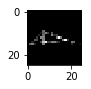

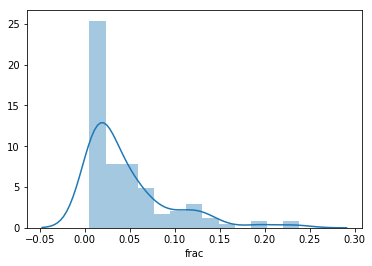

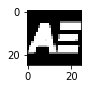

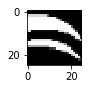

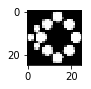

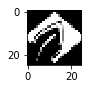

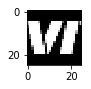

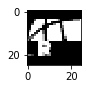

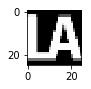

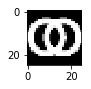

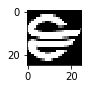

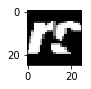

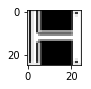

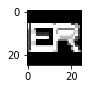

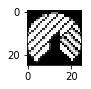

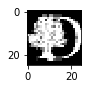

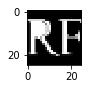

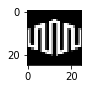

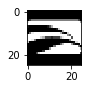

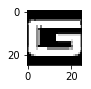

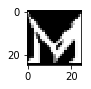

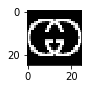

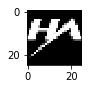

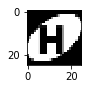

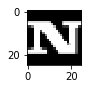

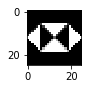

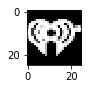

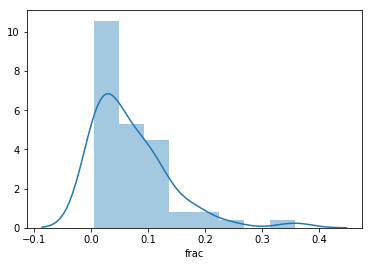

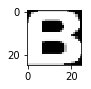

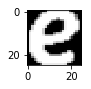

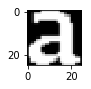

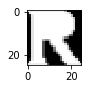

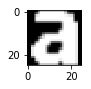

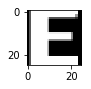

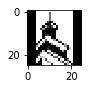

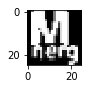

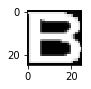

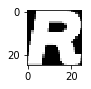

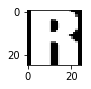

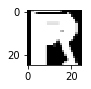

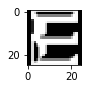

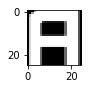

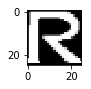

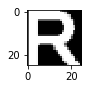

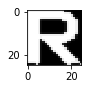

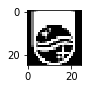

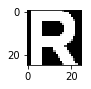

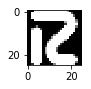

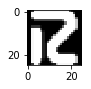

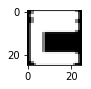

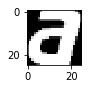

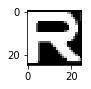

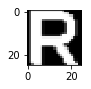

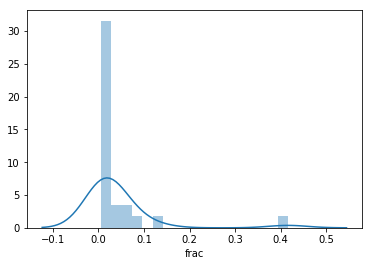

In [8]:
for j in range(nclust):
    explore_features = features.loc[feature_fit==j,:]
    features_mat = explore_features.loc[:,'0':'624'].as_matrix()
    
    for i in range(min(explore_features.shape[0],25)):
        plt.figure(figsize=(1,1))
        plt.imshow(features_mat[i,:].reshape(25,25), cmap="gray")
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.15)

    time.sleep(0.3)

    plt.figure()
    sns.distplot(explore_features.frac)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    time.sleep(1.5)

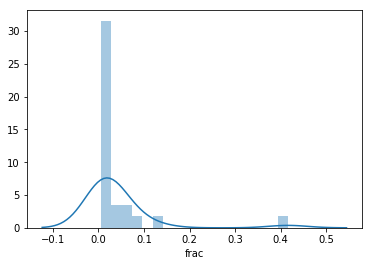

In [9]:
sns.distplot(explore_features.frac)

# Taking size into account

Next, I will try using a weighted combination of the actual feature shapes, and their sizes. The fraction of the image that is taken up by the feature will be given weight = 50.0.

In [10]:
scaled_feats = np.hstack([50.0*np.expand_dims(features.frac.values, axis=1), features.loc[:,'0':'624'].values])
scaled_feats = scaled_feats[features['frac'].values > 0.005,:]

Determine the number of clusters for the features:

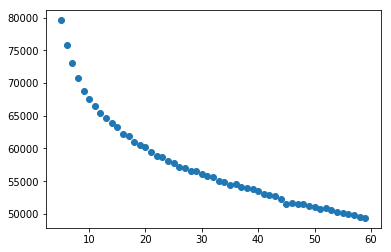

In [11]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

inertia = []
sizes = np.arange(5,60) 
for i in sizes:
    feature_clusters = cluster.KMeans(n_clusters=i)
    feature_clusters.fit(scaled_feats)
    inertia = np.append(inertia, feature_clusters.inertia_)
    
plt.scatter(sizes, inertia)


10-20 again appear appropriate; let's say 15.

In [12]:
scaled_clusters = cluster.KMeans(n_clusters=15)
scaled_fit = scaled_clusters.fit_predict(scaled_feats)
nclust = scaled_clusters.cluster_centers_.shape[0]
np.bincount(scaled_fit)

array([ 41,  23,  55, 162,  76,  28,  44,  24, 129,  28,  58,  31,  49,
        25,  74])

## Visualize the centers for the size-dependent clusters:

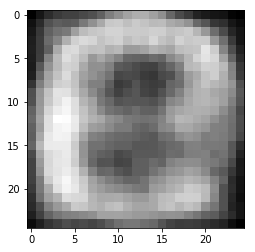

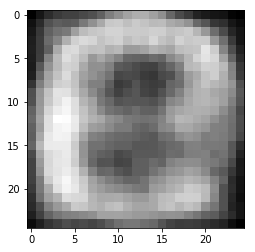

In [13]:
from IPython import display
import time

for i in range(nclust):
    print(i)
    plt.imshow(scaled_clusters.cluster_centers_[i,1:].reshape(25,25), cmap="gray")
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

Check the features within each cluster:

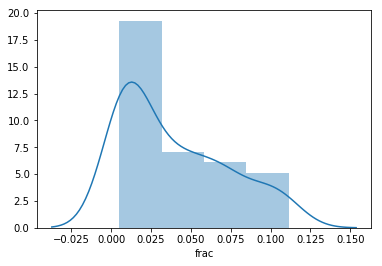

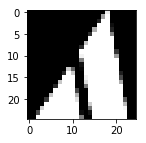

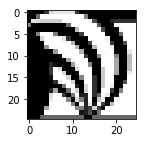

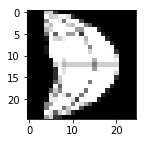

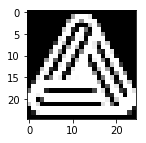

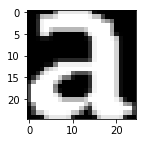

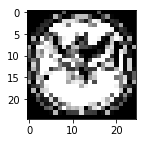

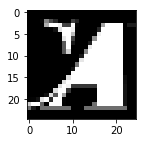

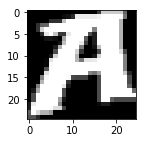

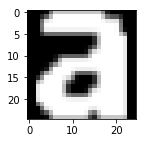

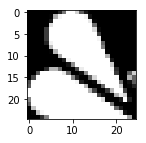

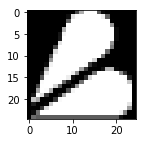

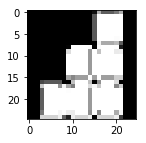

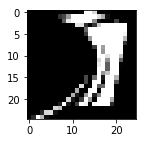

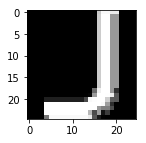

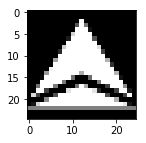

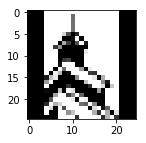

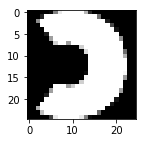

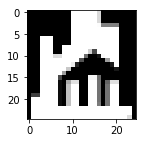

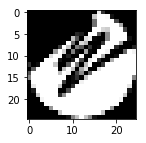

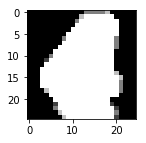

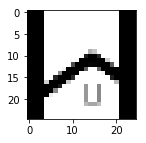

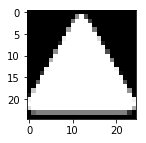

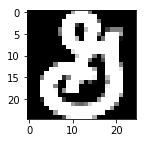

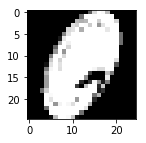

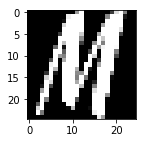

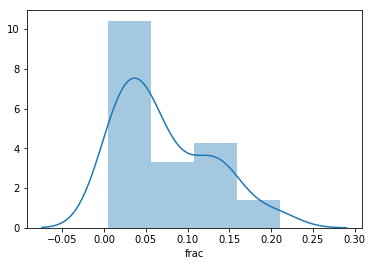

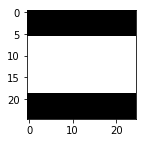

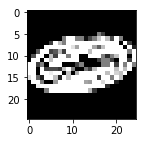

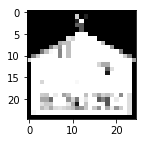

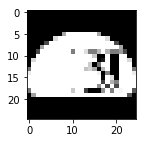

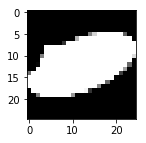

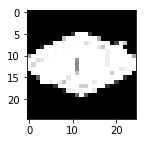

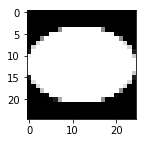

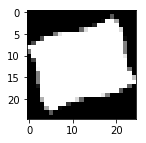

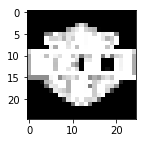

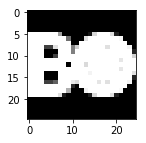

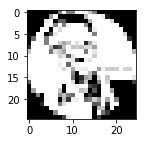

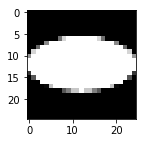

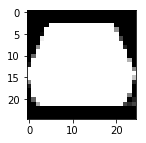

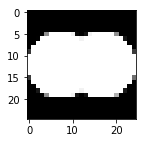

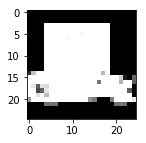

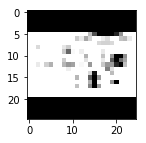

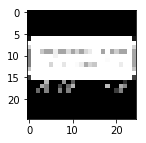

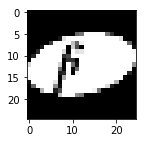

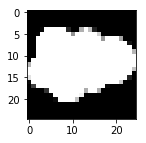

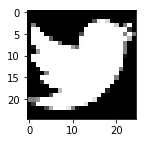

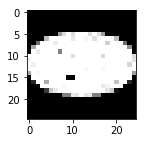

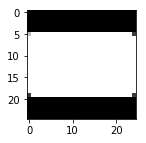

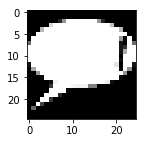

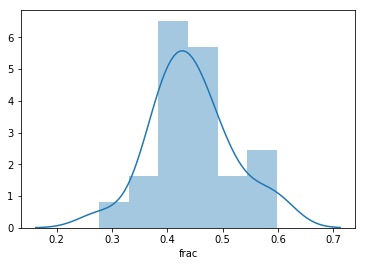

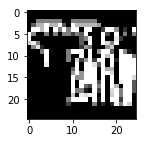

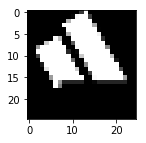

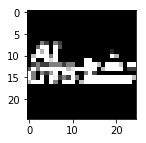

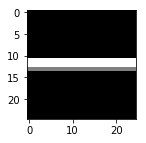

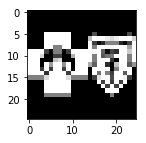

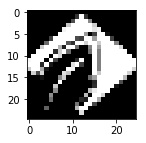

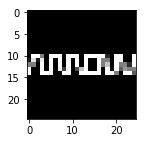

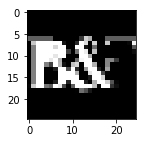

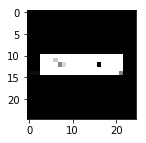

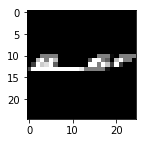

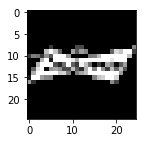

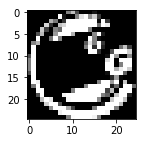

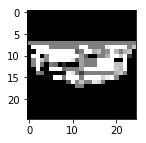

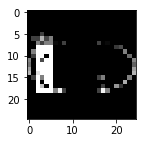

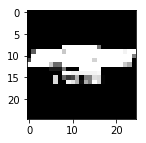

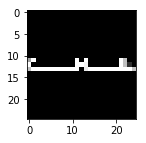

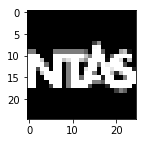

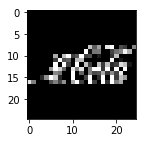

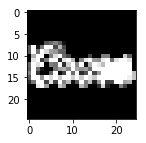

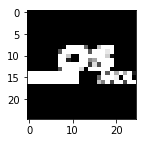

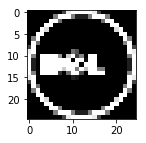

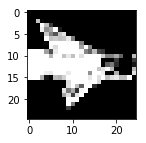

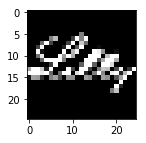

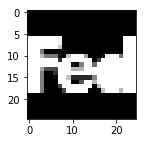

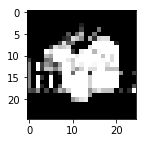

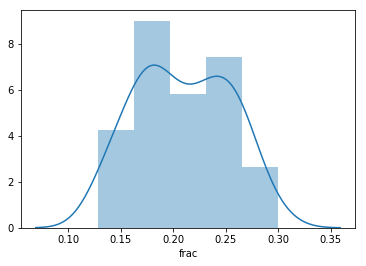

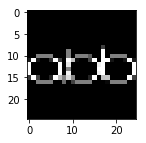

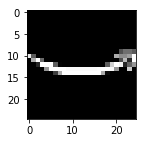

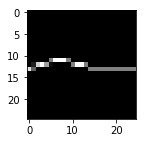

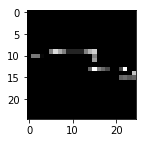

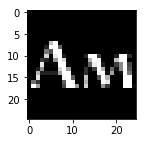

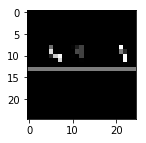

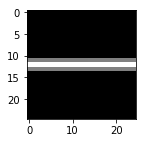

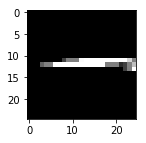

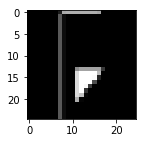

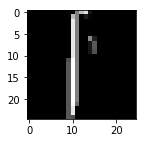

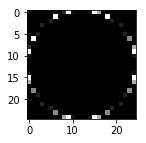

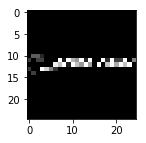

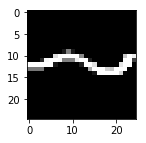

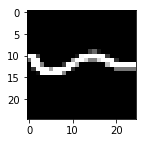

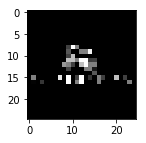

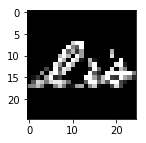

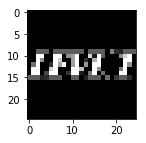

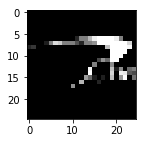

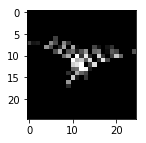

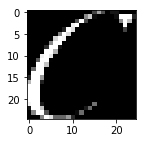

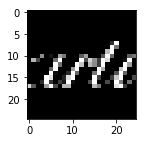

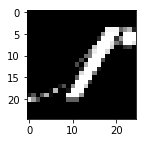

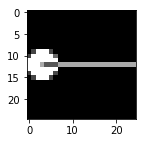

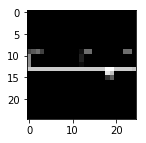

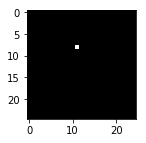

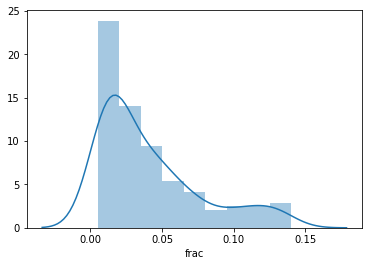

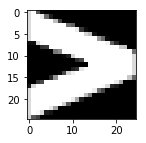

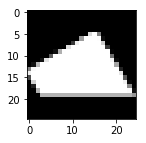

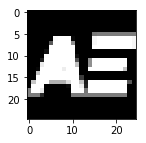

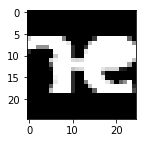

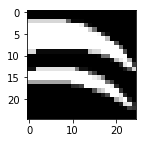

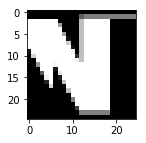

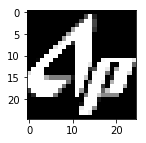

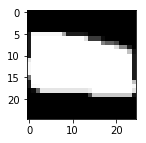

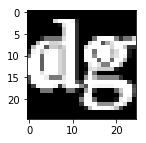

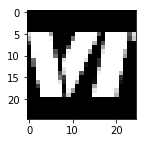

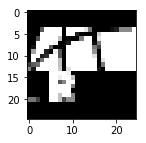

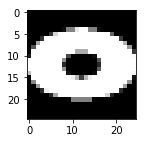

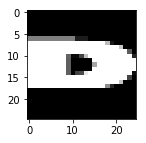

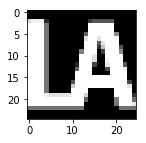

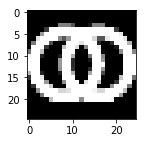

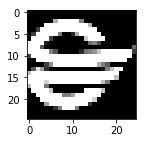

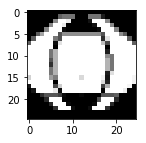

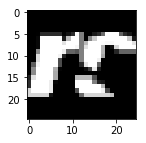

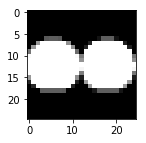

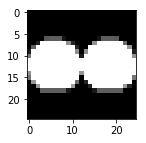

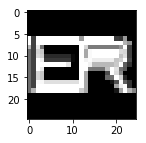

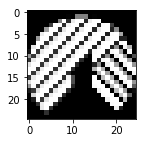

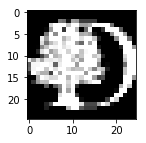

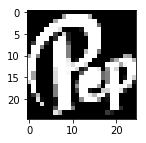

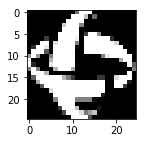

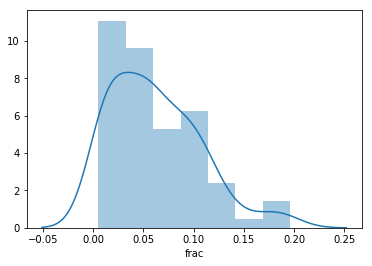

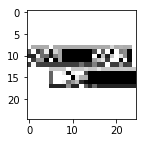

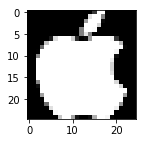

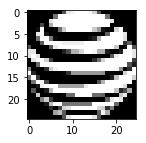

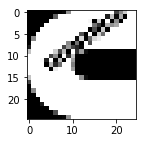

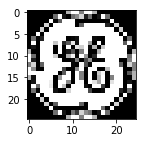

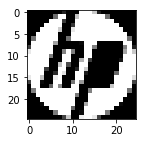

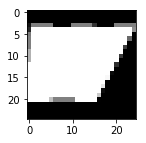

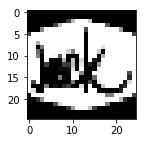

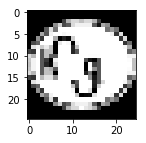

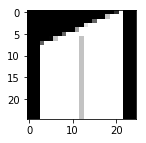

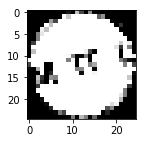

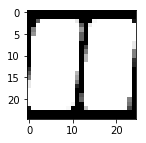

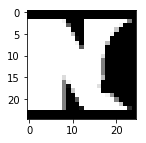

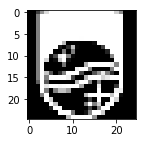

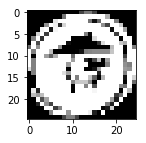

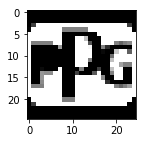

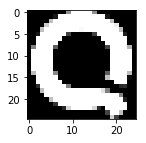

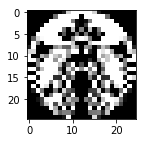

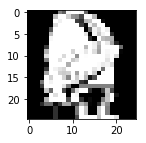

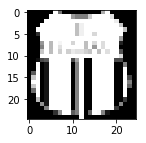

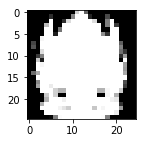

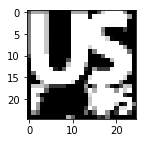

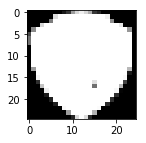

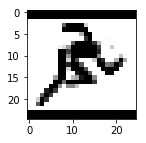

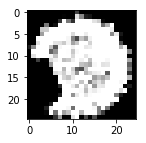

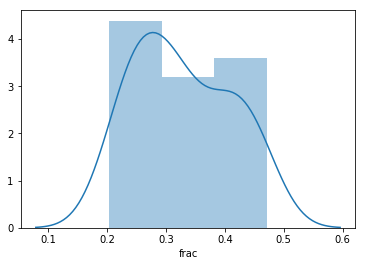

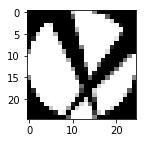

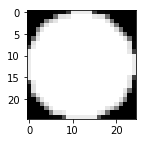

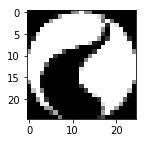

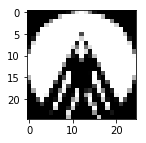

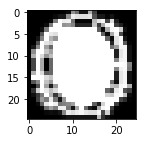

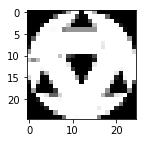

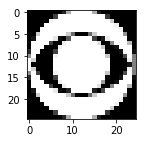

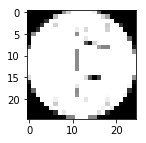

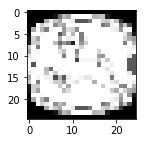

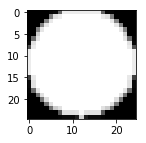

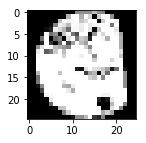

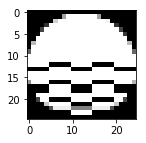

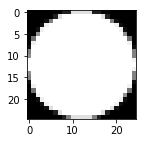

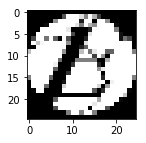

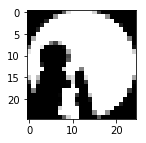

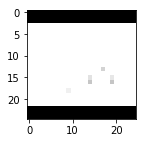

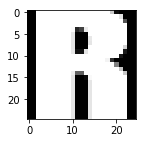

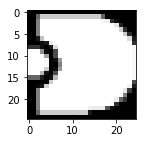

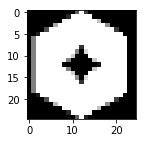

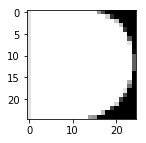

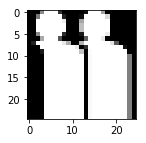

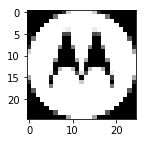

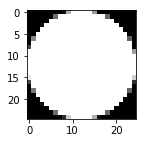

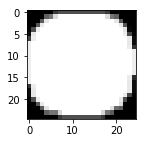

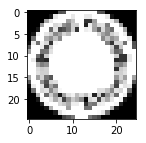

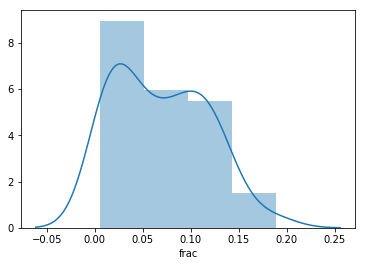

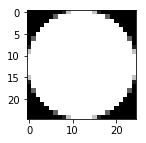

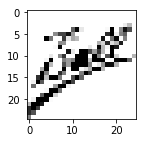

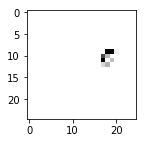

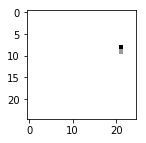

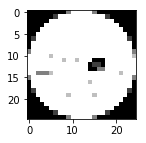

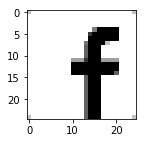

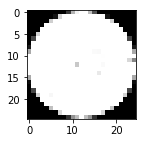

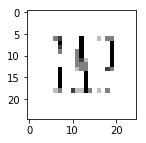

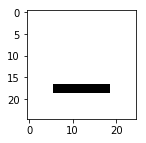

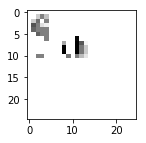

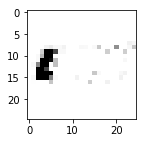

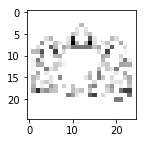

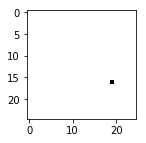

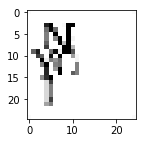

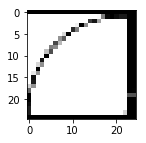

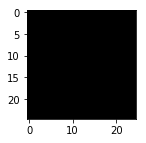

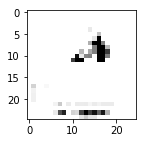

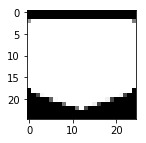

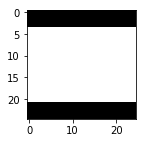

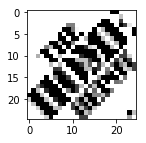

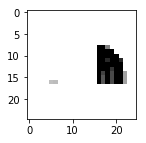

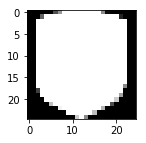

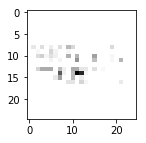

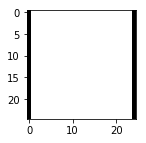

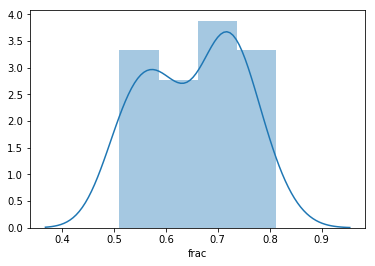

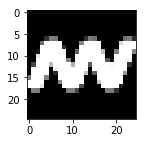

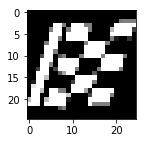

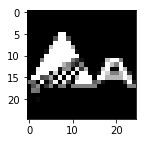

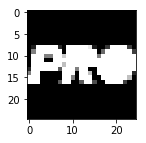

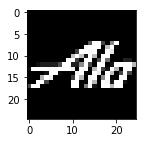

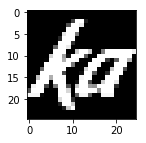

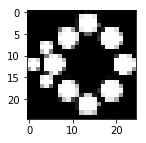

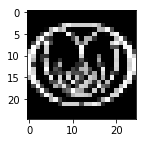

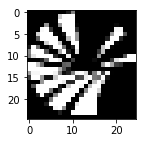

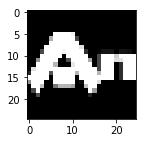

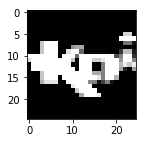

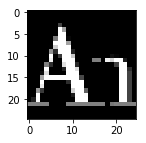

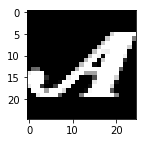

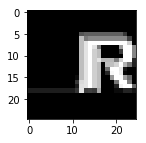

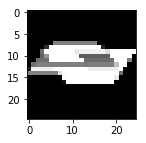

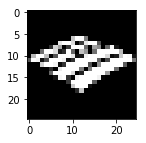

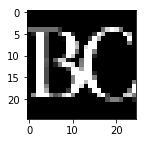

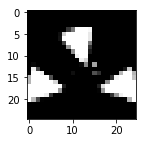

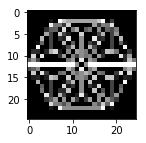

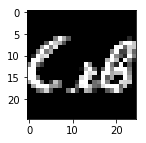

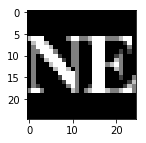

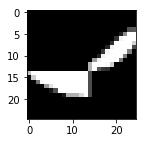

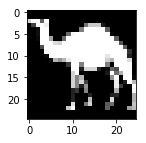

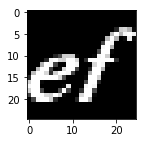

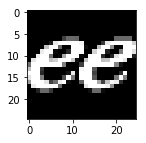

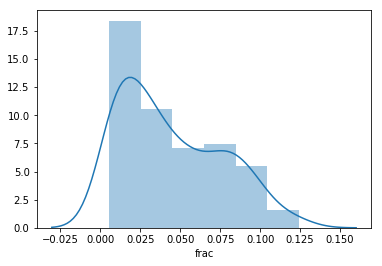

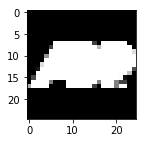

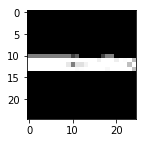

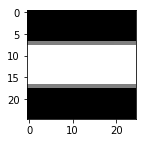

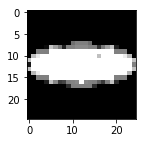

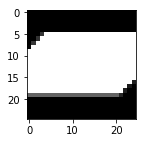

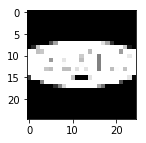

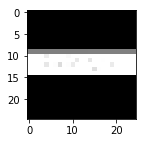

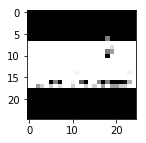

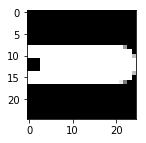

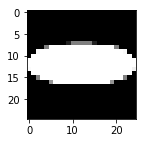

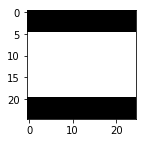

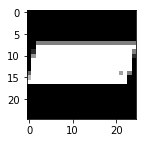

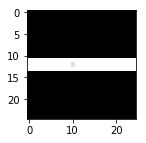

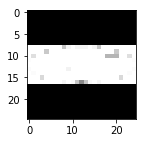

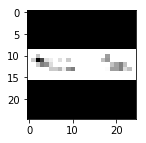

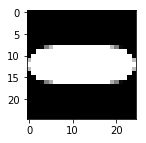

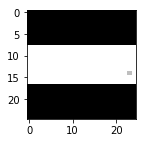

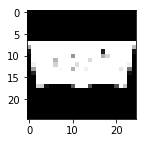

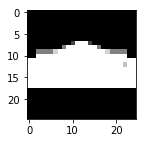

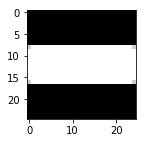

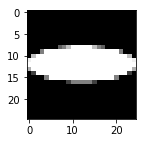

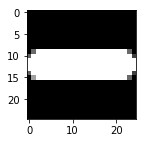

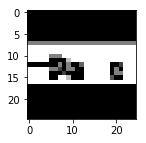

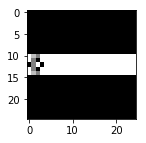

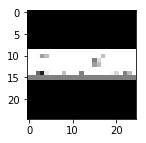

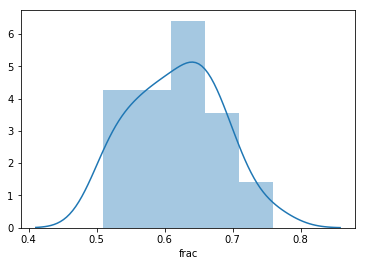

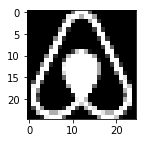

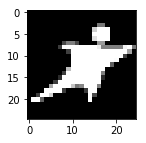

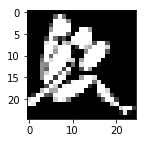

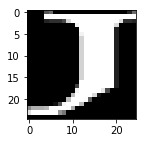

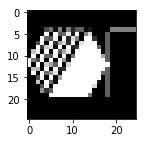

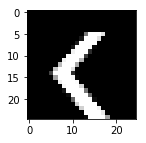

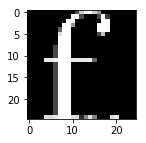

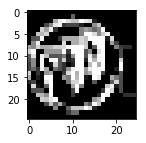

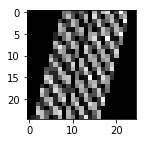

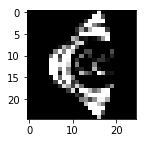

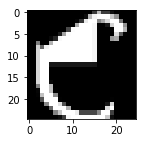

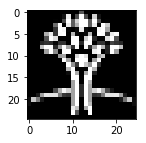

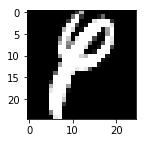

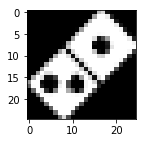

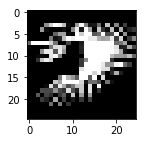

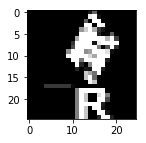

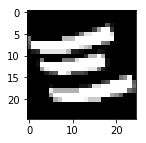

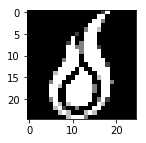

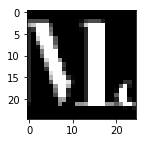

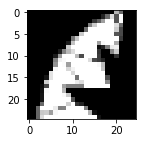

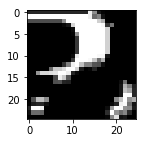

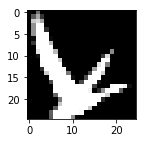

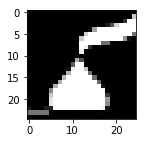

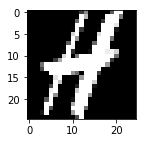

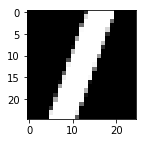

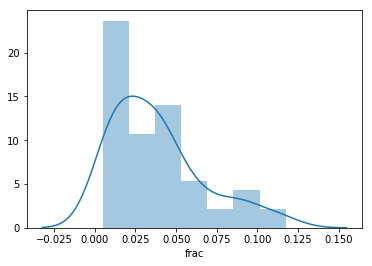

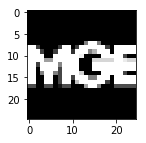

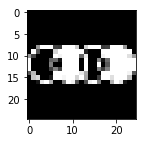

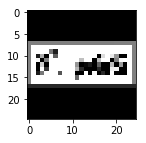

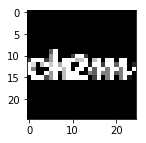

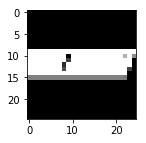

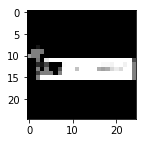

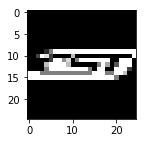

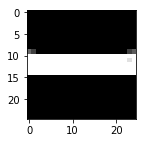

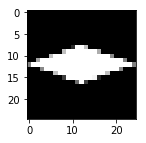

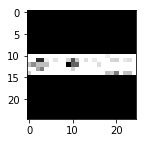

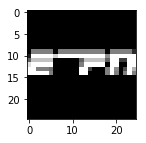

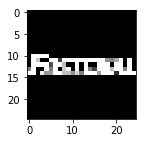

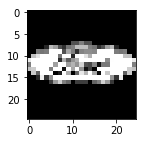

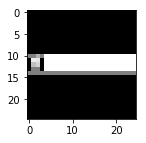

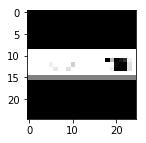

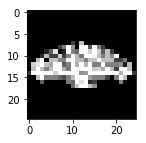

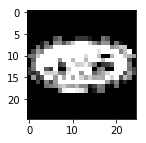

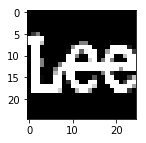

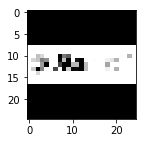

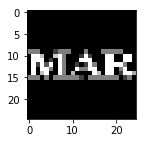

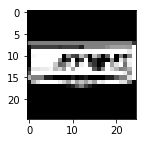

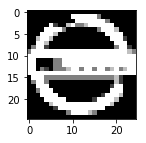

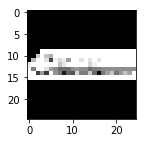

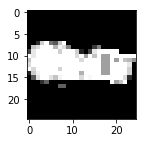

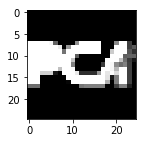

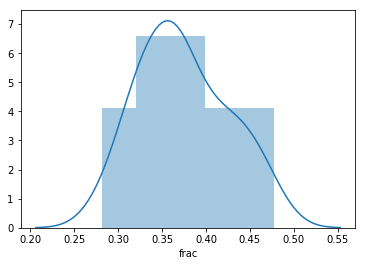

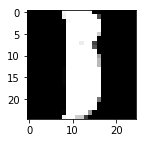

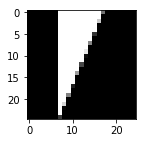

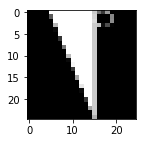

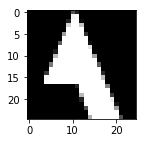

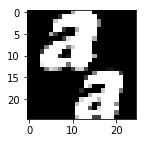

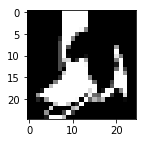

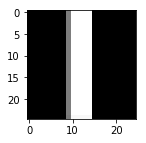

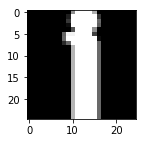

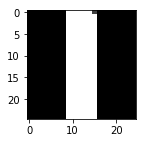

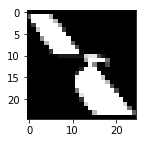

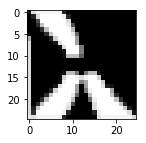

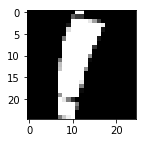

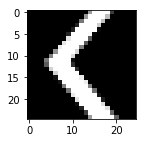

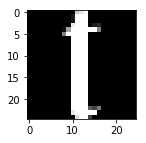

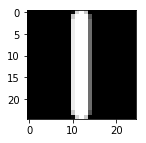

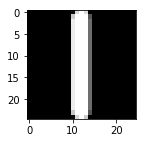

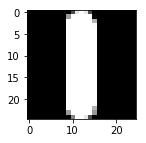

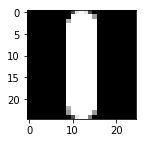

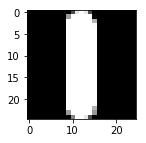

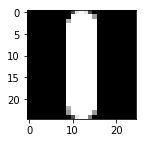

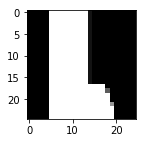

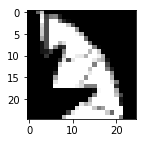

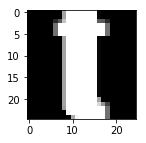

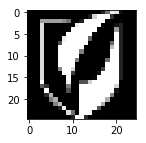

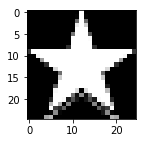

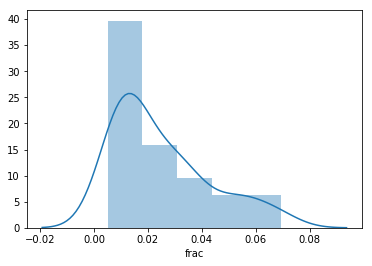

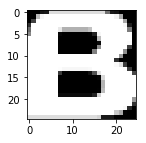

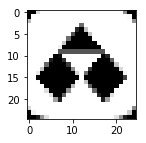

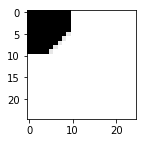

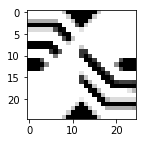

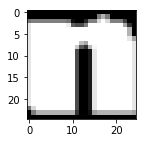

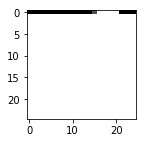

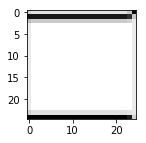

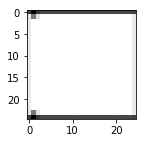

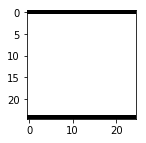

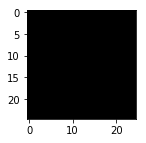

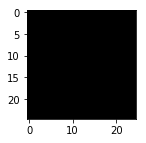

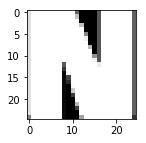

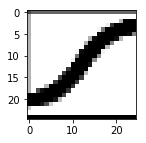

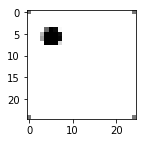

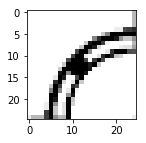

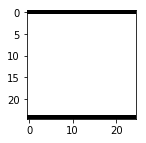

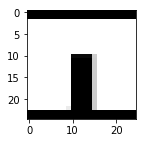

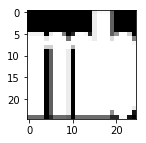

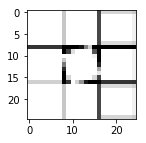

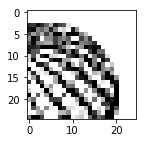

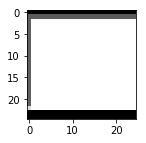

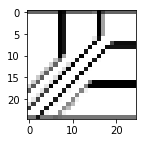

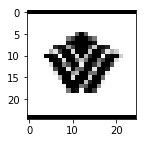

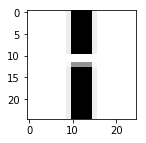

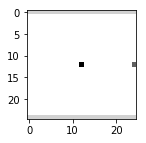

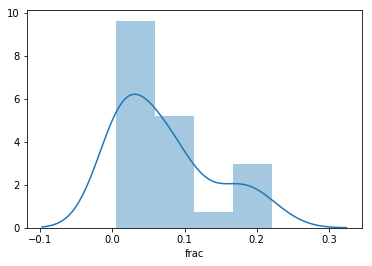

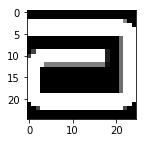

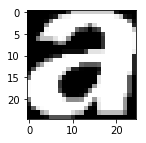

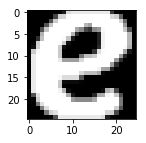

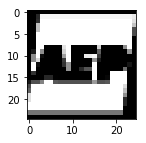

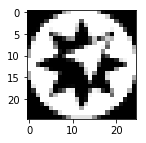

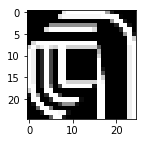

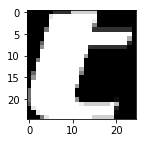

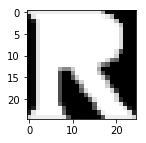

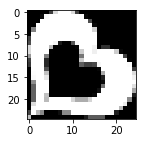

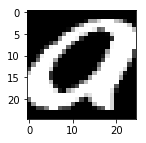

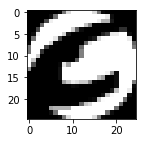

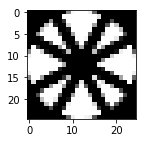

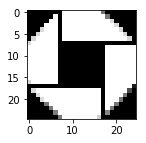

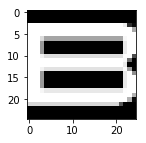

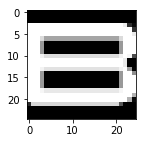

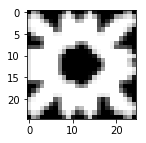

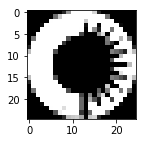

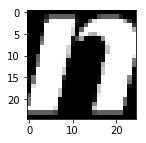

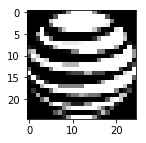

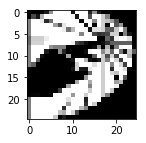

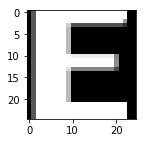

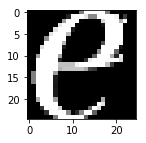

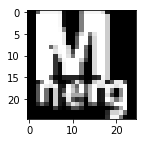

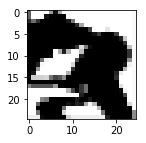

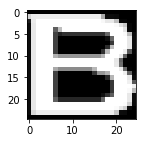

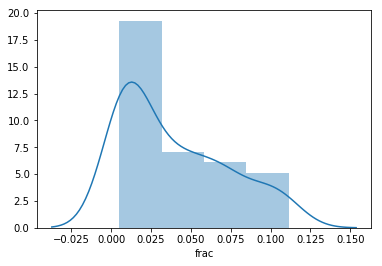

In [14]:
for j in range(nclust):
    explore_features = features.loc[scaled_fit==j,:]
    features_mat = explore_features.loc[:,'0':'624'].as_matrix()
    
    for i in range(min(explore_features.shape[0],25)):
        plt.figure(figsize=(2,2))
        plt.imshow(features_mat[i,:].reshape(25,25), cmap="gray")
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.15)

    time.sleep(0.3)

    plt.figure()
    sns.distplot(explore_features.frac)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    time.sleep(1.5)

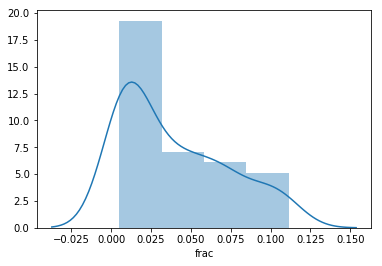

In [15]:
sns.distplot(explore_features.frac)

In [19]:
features['cluster'] = feature_fit
features['scaled_cluster'] = scaled_fit

In [20]:
features.to_csv("data/mark_features_erosion-char_higher_fixed_labeled.csv", index=False)